# Using Jupyter Books

The documentation uses [jupyterbook.org](https://jupyterbook.org/en/stable/start/overview.html) to convert Jupyter notebooks into html files.

This page details some basics of it's use.

## Installation

In a terminal:

``pip3 install -U jupyter-book``

I had an issue with traitlets on installation so I upgraded by:

``pip install --upgrade traitlets``

You can then create a new notebook folder (in the destination you are in) with:

``jupyter-book create mynewbook/``

And build it with:

``jupyter-book build mynewbook/``

Create produces a standard set-up and build is used to create the html pages within the ``_build/html`` folder

## Modifying cells- Tags

If we want to hide cells, their output or input. The following procedure is used by adding a tag to each cell.

First make the tags visible going to View-> Cell Toolbar-> Tags

<img src='_images/tags2.png' style="border:2px solid #B9B7B9; padding:3px; margin:5px"></img>

Then add a tag in the box and press `Add tag`

<img src='_images/tags2.png' style="border:2px solid #B9B7B9; padding:3px; margin:5px"></img>


Some tags to use:

- hide, can be reavealed with a box to click
    - `hide-input`
    - `hide-output`
    - `hide-cell`
- remove, can't be seen
    - `remove-input`
    - `remove-output`
    - `remove-cell`


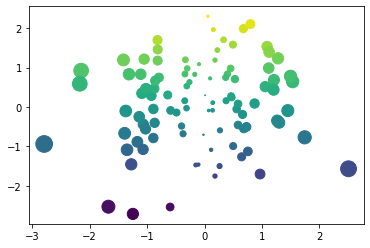

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));


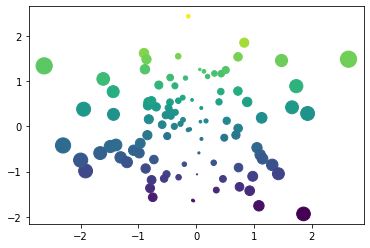

In [2]:
#hide-input
import numpy as np
import matplotlib.pyplot as plt
plt.ion()

data = np.random.randn(2, 100)
fig, ax = plt.subplots()
ax.scatter(*data, c=data[1], s=100*np.abs(data[0]));
